# 임베딩(Embedding)

![wordrepresentation[1].PNG](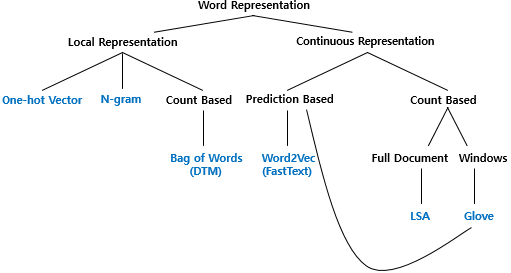)

- 워드 임베딩 챕터에서는 연속 표현(Continuous Representation)에 속함

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

<br>

### 희소 표현(Sparse Representation)
* **벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)**
  * 원-핫 벡터는 희소 벡터(sparse vector)

    `Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이때 1 뒤의 0의 수는 9995개.`

<br>

* **희소 벡터의 문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점**
 * 이러한 벡터 표현은 공간적 낭비를 불러일으킴
 * 희소 표현의 일종인 DTM과 같은 경우에도 특정 문서에 여러 단어가 다수 등장하였으나, 다른 많은 문서에서는 해당 특정 문서에 등장했던 단어들이 전부 등장하지 않는다면 역시나 행렬의 많은 값이 0이 되면서 공간적 낭비를 일으킴
* **원-핫 벡터와 같은 희소 벡터의 문제점은 단어의 의미를 표현하지 못한다는 점**

<br>

### 밀집 표현(Dense Representation)
* **밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않음**
* **사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤**
  * 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가짐

    `Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128`

  <br>


<br>

<br>


## 워드 임베딩(Word Embedding)

* **단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 하며, 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 함**

<br>

| | 원-핫 벡터 | 임베딩 벡터 |
| - | - | - |
| 차원 | 고차원 (단어 집합의 크기) | 저차원|
| 다른 표현 | 희소벡터의 일종 | 밀집 벡터의 일종|
| 표현방법 | 수동 | 훈련 데이터로 학습 |
| 값의 타입 | 1, 0 | 실수 |

<br>

## 워드투벡터(Word2Vec)
* **단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법**

* **Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식**
  * **CBOW는 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법**
  * **Skip-Gram은 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법**

<br>

### CBOW(Continuous Bag of Words)
* **CBOW는 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법**

<br>

`예문 : "The fat cat sat on the mat"`

![단어[1].PNG](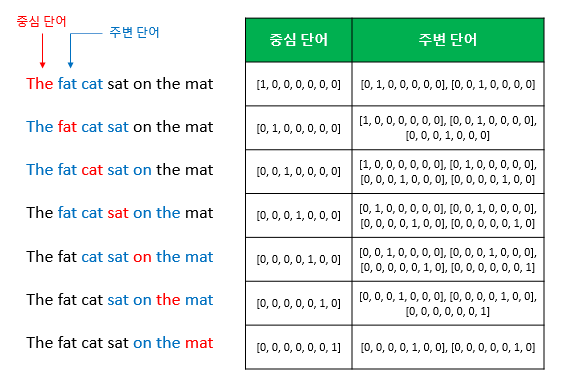)
<br>


* **예측해야하는 단어 : 중심 단어(center word)**
* **예측에 사용되는 단어 : 주변 단어(context word)**

* 중심 단어를 예측하기 위해서 **앞, 뒤로 몇 개의 단어를 볼지를 결정해야 하는데 이 범위를 윈도우(window)**
  * **슬라이딩 윈도우(sliding window)** : 윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋을 만드는 방법

* Word2Vec에서 입력은 모두 원-핫 벡터

<br>

#### CBOW의 인공 신경망

![word2vec_renew_1[2].png](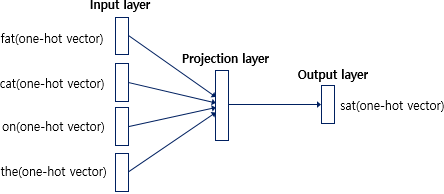)

* 입력층(Input layer) : **윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터**
* 출력층(Output layer) : **예측하고자 하는 중간 단어의 원-핫 벡터**

<br>

* **Word2Vec은 은닉층이 다수인 딥 러닝(deep learning) 모델이 아니라 은닉층이 1개인 얕은 신경망(shallow neural network)**
  * Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않음 (= 투사층(projection layer))


<br>

#### CBOW 동작 메커니즘

![word2vec_renew_2[1].PNG](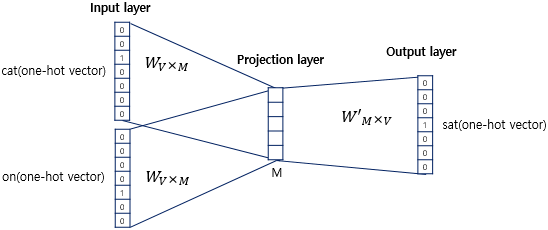)

* **투사층의 크기가 M**
  * CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원
  * 위의 그림에서 투사층의 크기는 M=5이므로 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5

* 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬
  * V는 단어 집합의 크기
    * 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬
    * 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬
  * 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 랜덤 값
  * CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조

<br>

![word2vec_renew_3[1].PNG](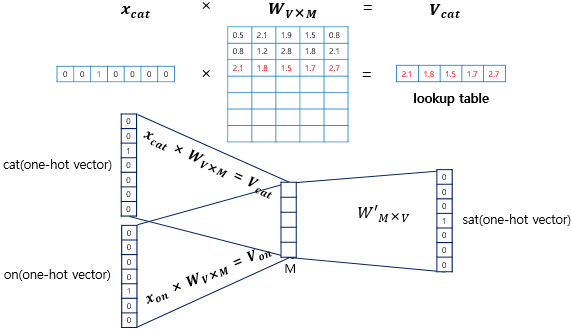)

* **i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와, 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일**
  * **이 작업을 룩업 테이블(lookup table)**
  * lookup해온 W의 각 행벡터가 Word2Vec 학습 후에는 각 단어의 M차원의 임베딩 벡터로 간주

<br>

![word2vec_renew_4[1].PNG](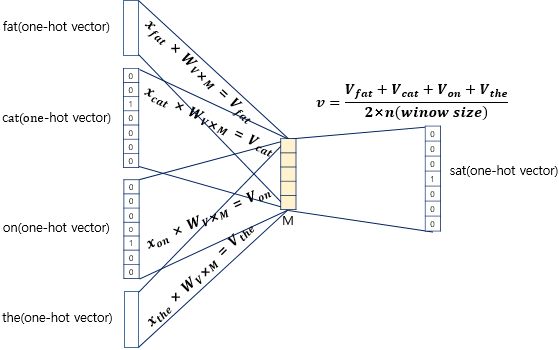)

* **주변 단어의 원-핫 벡터에 대해서, 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구함** 
  * 만약 윈도우 크기 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용 $→$ 평균을 구할 때는 4개의 결과 벡터에 대해서 평균
  
    (투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 차이점)

<br>

![word2vec_renew_5[1].PNG](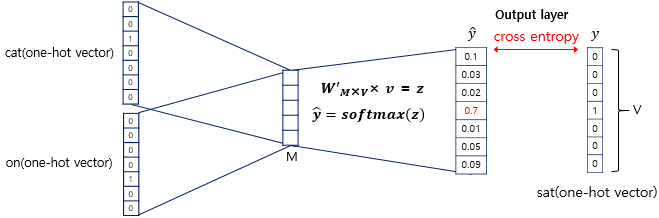)

* 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐
* **곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터**

* **이 벡터에 CBOW는 소프트맥스(softmax) 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1**
  * 다중 클래스 분류 문제를 위한 일종의 스코어 벡터(score vector)
  * **스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률**

<br>

* **스코어 벡터를 $\hat{y}$, 중심 단어의 원-핫 벡터를 $y$로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 크로스 엔트로피(cross-entropy) 함수를 사용**
* 크로스 엔트로피 함수에 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 **(V는 단어 집합의 크기)**

$$cost(\hat{𝑦}, y) = -\sum_{j=1}^{V}y_{j}\ log(\hat{𝑦_{j}})$$

* 역전파(Back Propagation)를 수행하면 W와 W'가 학습
* 학습이 완료되면, **M차원의 크기를 갖는 W의 행렬의 행을 각 단어의 임베딩 벡터로 사용하거나, W와 W' 행렬 두 가지 모두를 가지고 임베딩 벡터를 사용**

<br>

### Skip-gram
* **Skip-gram은 중심 단어에서 주변 단어를 예측**

<br>

![skipgram_dataset[1].PNG](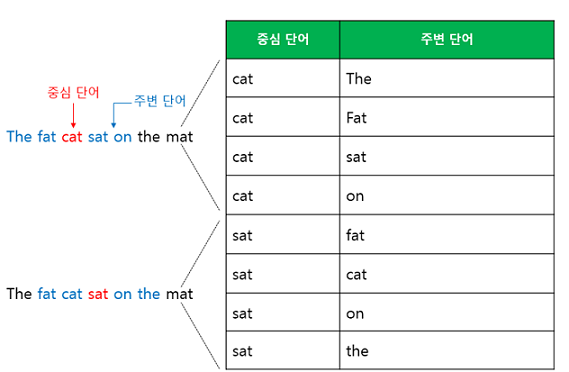)

![word2vec_renew_6[1].PNG](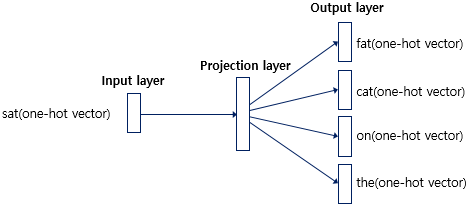)

* **중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없음**
* **전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져**

<br>

### NNLM Vs. Word2Vec

* **NNLM은 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입하였고, 워드 임베딩 자체에 집중하여 NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec**

![word2vec_renew_7[1].PNG](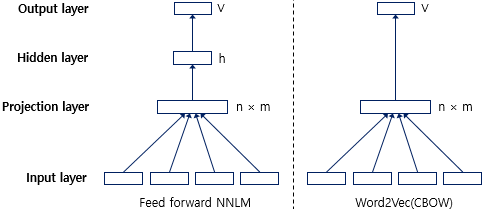)

* NNLM과 Word2Vec의 차이
  * 예측하는 대상 : 

    **NNLM은 다음 단어를 예측하는 언어 모델이 목적이므로 다음 단어를 예측**

    **Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측**

      **(NNLM이 예측 단어의 이전 단어들만을 참고하였던 것과는 달리, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고)**

  * 구조 : 
  
    **Word2Vec은 NNLM에 존재하던 활성화 함수가 있는 은닉층을 제거**
    
    이에 따라 투사층 다음에 바로 출력층으로 연결되는 구조



<br>

* Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유는 은닉층을 제거한 것뿐만 아니라 추가적으로 사용되는 기법들 사용
  * 계층적 소프트맥스(hierarchical softmax)
  * **네거티브 샘플링(negative sampling)**

<br>

#### NNLM의 연산
* 입력층에서 투사층, 투사층에서 은닉층, 은닉층에서 출력층으로 향하며 발생

$$NNLM = (n × m) + (n × m × h) + (h × V)$$

<br>

#### Word2Vec의 연산
* 추가적인 기법들까지 사용하였을 때, Word2Vec은 출력층에서의 연산에서 $V$를 $log(V)$로 변경 가능 $\rightarrow$ Word2Vec의 연산량은 NNLM보다 훨씬 빠른 학습 속도

$$Word2Vec = (n × m) + (m × log(V))$$

<br>

<br>

## 영어/한국어 Word2Vec 실습

<br>

### 영어 Word2Vec 만들기

In [32]:
import gensim
gensim.__version__

'4.3.1'

In [ ]:
pip install konlpy

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f3947cb2f80>)

<br>


- 얻고자 하는 데이터는 영어문장으로만 구성된 내용을 담고 있는 <content>와 </content> 사이의 내용
* <content>와 </content> 사이의 내용 중에는 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 제거

```xml
<file id="1">
  <head>
<url>http://www.ted.com/talks/knut_haanaes_two_reasons_companies_fail_and_how_to_avoid_them</url>
       <pagesize>72832</pagesize>
... xml 문법 중략 ...
<content>
Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities:
... content 내용 중략 ...
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
... content 내용 중략 ...
(Applause)
</content>
</file>
<file id="2">
    <head>
<url>http://www.ted.com/talks/lisa_nip_how_humans_could_evolve_to_survive_in_space<url>
... 이하 중략 ...
```

- 전처리

In [48]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용 추출
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [49]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 문장 토큰화
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 단어 토큰화
result = [word_tokenize(sentence) for sentence in normalized_text]

In [50]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [51]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


<br>

#### Word2Vec 훈련

<br>

#### `gensim.models.Word2Vec(sentences, vector_size, min_count, workers, sg)`
- `size` = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- `window` = 컨텍스트 윈도우 크기
- `min_count` = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- `workers` = 학습을 위한 프로세스 수
- `sg` = 0은 CBOW, 1은 Skip-gram.

In [53]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [55]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, sg=0)

In [56]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8535395264625549), ('guy', 0.8228437304496765), ('lady', 0.7493034601211548), ('gentleman', 0.7425252199172974), ('boy', 0.7416621446609497), ('girl', 0.7281656861305237), ('soldier', 0.7196103930473328), ('kid', 0.6891018152236938), ('poet', 0.6782656908035278), ('friend', 0.6578902006149292)]


<br>

#### Word2Vec 모델 저장하고 로드

<br>

#### `Word2Vec모델.wv.save_word2vec_format()` : 모델 저장
#### `KeyedVectors.load_word2vec_format()` : 모델 로드

In [57]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

<br>

#### `Word2Vec모델.most_similar(positive, negative, topn)` 
- `positive`와 가장 유사하며 `negative`와 가장 유사하지 않은 단어 `topn`개 출력

In [59]:
loaded_model.most_similar(positive="man")

[('woman', 0.8535395264625549),
 ('guy', 0.8228437304496765),
 ('lady', 0.7493034601211548),
 ('gentleman', 0.7425252199172974),
 ('boy', 0.7416621446609497),
 ('girl', 0.7281656861305237),
 ('soldier', 0.7196103930473328),
 ('kid', 0.6891018152236938),
 ('poet', 0.6782656908035278),
 ('friend', 0.6578902006149292)]

<br>

<br>

### 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [61]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f3905abbbe0>)

In [62]:
train_data = pd.read_table('ratings.txt')

In [66]:
print(train_data.shape)
train_data.head(5)

(200000, 3)


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


- 결측값 제거

In [68]:
train_data = train_data.dropna(how='any')
train_data.shape

(199992, 3)

<br>

- 한글 외 문자 제거 

In [70]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-70-6948268dad63>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


<br>

* 불용어 제거

In [71]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

- 형태소 분석기 OKT를 사용한 토큰화 작업

In [80]:
okt = Okt()

In [83]:
tokenized_data = []

for sentence in tqdm(train_data['document']):

    tokenized_sentence = okt.morphs(phrase=sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [42:32<00:00, 78.36it/s]


<br>

* 각 리뷰의 길이 분포확인

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


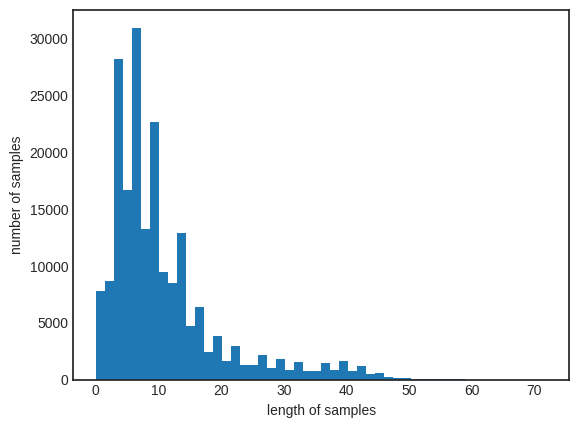

In [84]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

<br>

* Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터 학습

In [85]:
from gensim.models import Word2Vec

In [86]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, sg = 0)

In [87]:
model.wv.vectors.shape

(16477, 100)

In [88]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8451437950134277), ('이정재', 0.837945282459259), ('한석규', 0.8321151733398438), ('최민수', 0.8308266401290894), ('유다인', 0.8244963884353638), ('김명민', 0.8198907971382141), ('이미숙', 0.8184258937835693), ('채민서', 0.8119826316833496), ('클로즈', 0.808949887752533), ('이민호', 0.8079953789710999)]


<br>

### 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding)

모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

<br>

* 자연어 처리 작업을 할때, 케라스의 Embedding()를 사용하여 갖고 있는 훈련 데이터로부터 처음부터 임베딩 벡터를 훈련시키기도 하지만, 위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있음

  * 예) 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능


In [89]:
import gensim
import urllib.request

* 구글의 사전 훈련된 Word2Vec 모델을 로드.

In [ ]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(word2vec_model.vectors.shape)

(3000000, 300)


<br>

* 사전 훈련된 임베딩을 사용하여 두 단어의 유사도를 계산

In [ ]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [ ]:
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

<br>

<br>

## 네거티브 샘플링(Negative Sampling)
* Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트
* **만약 단어 집합의 크기가 수만 이상에 달한다면 이 작업은 굉장히 무거운 작업이므로, Word2Vec은 꽤나 학습하기에 무거운 모델**

* **Word2Vec은 역전파 과정에서 모든 단어의 임베딩 벡터값의 업데이트를 수행하지만, 만약 현재 집중하고 있는 중심 단어와 주변 단어가 '강아지'와 '고양이', '귀여운'과 같은 단어라면, 사실 이 단어들과 별 연관 관계가 없는 '돈가스'나 '컴퓨터'와 같은 수많은 단어의 임베딩 벡터값까지 업데이트하는 것은 비효율적**

<br>

* **네거티브 샘플링은 Word2Vec이 학습 과정에서 전체 단어 집합이 아니라, 일부 단어 집합에만 집중할 수 있도록 하는 방법**
  * 현재 집중하고 있는 주변 단어가 '고양이', '귀여운'이라면, '돈가스', '컴퓨터', '회의실'과 같은 단어 집합에서 무작위로 선택된 **주변 단어가 아닌 단어들을 일부 가져옴**
  * 하나의 중심 단어에 대해서 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고, **마지막 단계를 이진 분류 문제로 변환**

<br>

### 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)

* Skip-gram은 중심 단어로부터 주변 단어를 예측하는 모델

  ![그림1[1].PNG](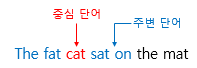)

* 기존의 Skip-gram 모델을 일종의 주황 박스로 생각해본다면,

 **입력은 중심 단어, 모델의 예측은 주변 단어인 구조**

  ![그림1-1[1].PNG](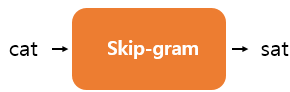)

<br>

#### 네거티브 샘플링을 사용하는 Skip-gram(Skip-Gram with Negative Sampling, SGNS)
- **중심 단어와 주변 단어가 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 그 확률을 예측**

  ![그림1-2[1].PNG](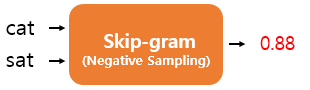)

<br>

#### 기존의 Skip-gram 데이터셋을 SGNS의 데이터셋으로 전환

* **기존 Skip-gram 데이터셋**

![그림3[1].PNG](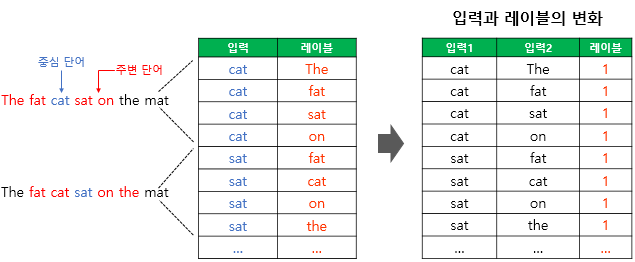)

* 좌측의 테이블은 기존의 Skip-gram을 학습하기 위한 데이터셋
* **Skip-gram은 기본적으로 중심 단어를 입력, 주변 단어를 레이블**
  * **기존의 Skip-gram 데이터셋에서 중심 단어와 주변 단어를 각각 입력1, 입력2로 가정**
  * **실제로 윈도우 크기 내에서 이웃 관계였므로 레이블은 1**

![그림4[1].PNG](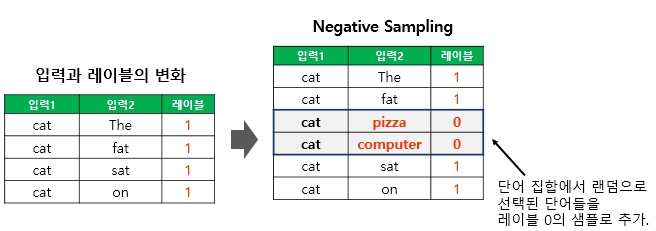)

* **입력1(중심 단어)과 주변 단어 관계가 아닌 단어들을 입력2로 삼기 위해서 단어 집합에서 랜덤으로 선택한 단어들을 입력2로 하고, 레이블을 0으로 설정**
  * **입력1과 입력2가 실제로 윈도우 크기 내에서 이웃 관계인 경우에는 레이블이 1, 아닌 경우에는 레이블이 0**

![그림5[1].PNG](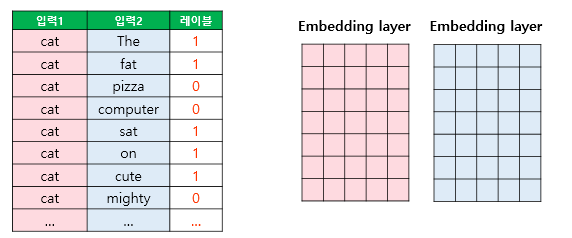)

* 두 개의 임베딩 테이블 중 

  **하나는 입력 1인 중심 단어의 테이블 룩업을 위한 임베딩 테이블** 
  
  **하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블**

* 각 단어는 각 임베딩 테이블을 테이블 룩업하여 임베딩 벡터로 변환


![그림6[1].PNG](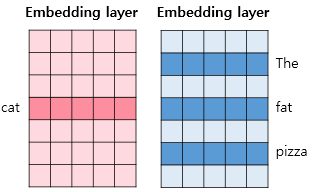)


![그림7[1].PNG](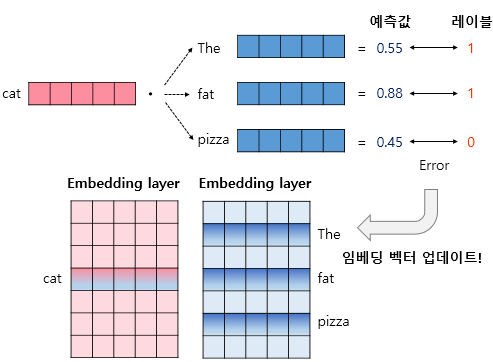)

* **중심 단어와 주변 단어의 내적값을 이 모델의 예측값으로 하고, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트**
* 학습 후에는 좌측의 임베딩 행렬을 임베딩 벡터로 사용할 수도 있고, 두 행렬을 더한 후 사용하거나 두 행렬을 연결(concatenate)해서 사용

<br>


### 20뉴스그룹 데이터 실습

In [92]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [93]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


-  불필요한 토큰을 제거하고, 소문자화를 통해 정규화

In [94]:
news_df = pd.DataFrame({'document':documents})

# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")

# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-94-8f133937e839>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


- 결측값/빈 값(empy) 확인

In [98]:
news_df.isnull().values.any()

False

In [97]:
news_df.replace("", float("NaN"), inplace=True)
print(news_df.isnull().values.any())

news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

True
총 샘플 수 : 10995


<br>

- NLTK에서 정의한 불용어 리스트를 사용하여 불용어를 제거

In [100]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [101]:
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

- 모든 샘플 중 단어가 1개 이하인 경우를 모두 찾아 제거

In [102]:
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


- 단어 집합을 생성하고, 정수 인코딩을 진행

In [103]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [105]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


<br>

### 네거티브 샘플링을 통한 데이터셋 구성
* 네거티브 샘플링을 위해서 케라스에서 제공하는 전처리 도구인 skipgrams를 사용

<br>

* **윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블**

 **그렇지 않은 경우는 0의 레이블**을 가지도록 하여 데이터셋을 구성

<br>

#### `tensorflow.keras.preprocessing.sequence.skipgrams(sentences, vocabulary_size, window_size)`

In [106]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [107]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [114]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(ruin (9470), media (702)) -> 1
(whole (217), shrinkwrap (63549)) -> 0
(austria (4866), licences (25811)) -> 0
(guilt (4989), look (66)) -> 1
(austria (4866), bigdesk (15723)) -> 0


<br>

### Skip-Gram with Negative Sampling(SGNS) 구현

In [112]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

* 두 개의 임베딩 층을 추가
  * 각 임베딩 테이블은 중심 단어와 주변 단어 각각을 위한 임베딩 테이블
  * 각 단어는 임베딩 테이블을 거쳐서 내적을 수행하고, 내적의 결과는 1 또는 0을 예측하기 위해서 시그모이드 함수를 활성화 함수로 최종 예측

In [115]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

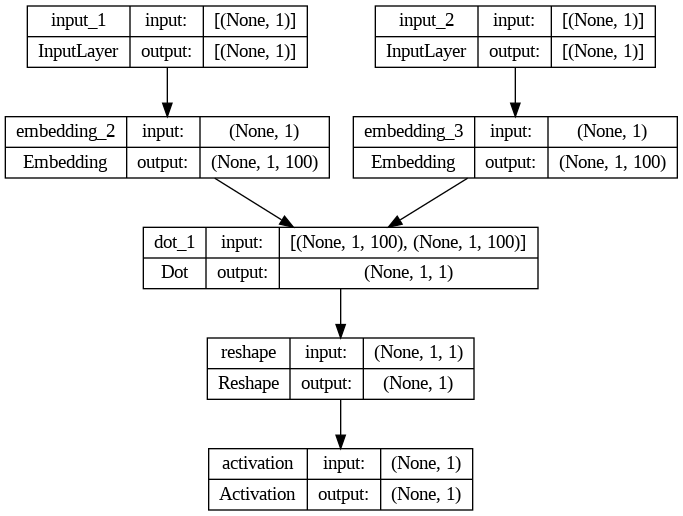

In [116]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

<br>

- 모델 학습

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4623.3008370772
Epoch : 2 Loss : 3675.1271531600505
Epoch : 3 Loss : 3522.1746307816356
Epoch : 4 Loss : 3321.537118319422
Epoch : 5 Loss : 3096.837727518752


<br>

- 결과 확인, 모델 저장

In [ ]:
import gensim

In [ ]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['disease'])

[('infection', 0.6822181940078735),
 ('patients', 0.6786915063858032),
 ('diseases', 0.6778280138969421),
 ('yeast', 0.637976348400116),
 ('lyme', 0.6234785318374634),
 ('lesions', 0.62334144115448),
 ('treat', 0.6229036450386047),
 ('nerve', 0.6226518750190735),
 ('quack', 0.6102176308631897),
 ('chronic', 0.6035628318786621)]

In [ ]:
w2v.most_similar(positive=['soldiers'])

[('wounded', 0.7870566248893738),
 ('hamas', 0.780727744102478),
 ('slaughter', 0.778682291507721),
 ('massacred', 0.7761104702949524),
 ('palestinians', 0.7727225422859192),
 ('villages', 0.7700804471969604),
 ('shelling', 0.7644733190536499),
 ('occupation', 0.7623903751373291),
 ('terrorist', 0.7594828009605408),
 ('killed', 0.7571672201156616)]